In [2]:
import tensorflow as tf
import numpy as py
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
print(tf.__version__)

/home/tanvi/anaconda3/envs/my_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tanvi/anaconda3/envs/my_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tanvi/anaconda3/envs/my_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tanvi/anaconda3/envs/my_env/lib/python3.7/s

1.14.0


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


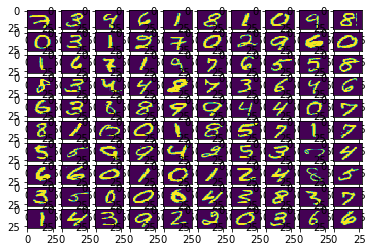

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot= True)

fig, ax = plt.subplots(10,10)

k=0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow( mnist.train.images[k].reshape(28,28), aspect='auto')
        k += 1
plt.show()

In [4]:
print("Shape of feature matrix: ", mnist.train.images.shape)

Shape of feature matrix:  (55000, 784)


In [5]:
print("Shape of target matrix: ", mnist.train.labels.shape)

Shape of target matrix:  (55000, 10)


In [6]:
print("One-hot encoding of the 1st observtion", mnist.train.labels[0]) #number 7

One-hot encoding of the 1st observtion [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [7]:
#Allocating space
x = tf.placeholder("float", [None, 784]) # training set
W = tf.Variable(tf.zeros([784, 10])) # weights
b = tf.Variable(tf.zeros([10])) # bias

y = tf.nn.softmax(tf.matmul(x,W) + b) #weighted sum of inputs plus bias
y_= tf.placeholder("float", [None, 10]) #output or target

cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

#Initialize all alocated variables above
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)


Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [8]:
#Train Model
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict= {x: batch_xs, y_: batch_ys})

In [9]:
#Prediction
correct_prediction = tf.equal( tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean( tf.cast(correct_prediction, "float"))
print(sess.run(accuracy, feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))
print(sess.run(correct_prediction, feed_dict = {x: mnist.test.images, y_: mnist.test.labels})) 

0.9157
[ True  True  True ...  True  True  True]


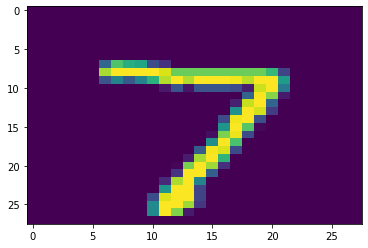

Actual:  7
Prediction:  7


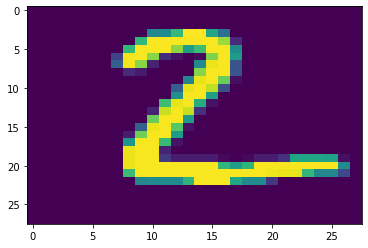

Actual:  2
Prediction:  2


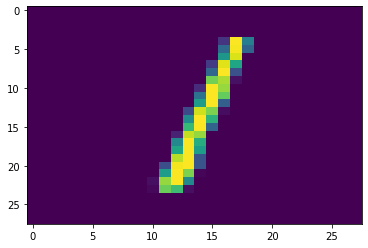

Actual:  1
Prediction:  1


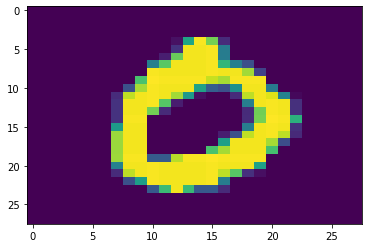

Actual:  0
Prediction:  0


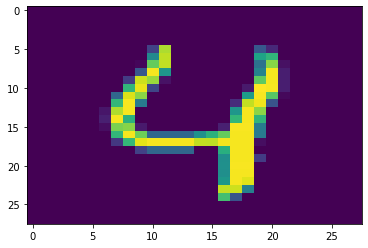

Actual:  4
Prediction:  4


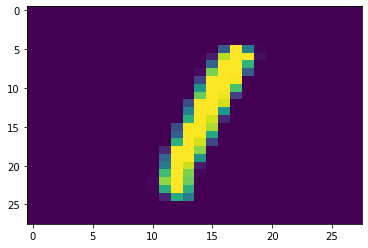

Actual:  1
Prediction:  1


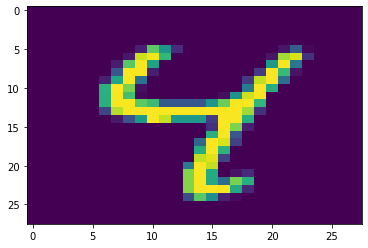

Actual:  4
Prediction:  4


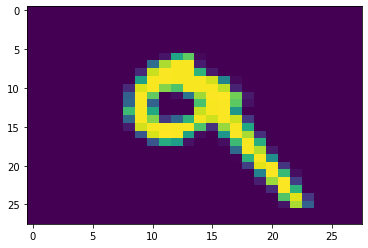

Actual:  9
Prediction:  9


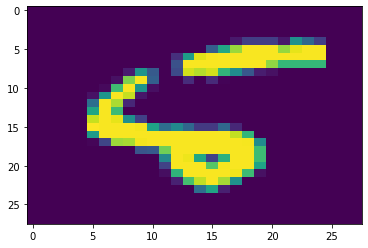

Actual:  5
Prediction:  6


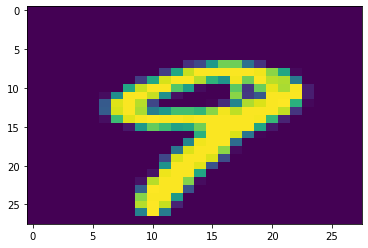

Actual:  9
Prediction:  9


In [12]:
#Sample
for i in range(10):
    fig, ax = plt.subplots(1,1)
    ax.imshow( mnist.test.images[i].reshape(28,28), aspect='auto')
    plt.show()

    actual = tf.argmax(y_, 1)
    prediction = tf.argmax(y, 1)
    print("Actual: ", sess.run(actual[i], feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))
    print("Prediction: ", sess.run(prediction[i], feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))
